<a href="https://colab.research.google.com/github/afifrizkyandika11551100310/APRIL_DATA_SCIENTIST_ASSIGNMENT_M-Afif-Rizky-A/blob/main/Palm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Scientist_APRIL_Assignment**
**Name** : M Afif Rizky A <br>
**Email** : afifrizky933@gmail.com / 23521034@std.stei.itb.ac.id 

Analytics Skills **Evaluation Requirement**:
*	Q1 & Q2 are mandatory, Q3 is bonus if attempted.
*	Do the analytics in cloud where possible (free trial versions).
*	Other methods are also acceptable.
*	Do include documentations

A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in **analysing on how external factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines the FFB yield, and are linked to the external factors**. Perform the analysis, which requires some study on the background of oil palm tree physiology

### **Library and Data Dependency**

In [ ]:
pip install pycaret

In [ ]:
pip install Jinja2

In [ ]:
pip install markupsafe==2.0.1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import heatmap
import missingno as msno
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import mannwhitneyu
from scipy.stats import normaltest
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
# Read Data
df = pd.read_csv('palm.csv')
df.head(10).round(2)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.31,21.3,32.2,184.4,25,777778.40,1.62
1,01.02.2008,568.9,26.17,20.9,35.1,140.2,23,767988.28,1.45
2,01.03.2008,577.6,25.45,21.3,32.9,280.4,25,783951.92,1.56
3,01.04.2008,581.1,26.90,20.6,34.8,173.3,25,788987.05,1.39
4,01.05.2008,545.4,27.24,20.9,35.0,140.6,25,813659.72,1.44
5,01.06.2008,532.5,27.12,21.4,35.5,182.3,24,829817.57,1.48
6,01.07.2008,544.7,27.04,21.2,33.9,201.6,26,814475.30,1.66
7,01.08.2008,569.9,27.20,21.7,34.5,283.2,26,782279.53,1.71
8,01.09.2008,571.7,27.56,21.2,35.1,176.3,25,795237.65,1.62
9,01.10.2008,565.3,27.36,22.1,33.9,217.5,24,765090.86,1.86


In [3]:
# Descriptive Analytics
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


### **Normality Testing**

In [4]:
stat, p = normaltest(df['SoilMoisture'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=3.741, p=0.154
Sample looks Gaussian (fail to reject H0)


In [5]:
stat, p = normaltest(df['Average_Temp'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=2.845, p=0.241
Sample looks Gaussian (fail to reject H0)


In [6]:
stat, p = normaltest(df['Min_Temp'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=29.495, p=0.000
Sample does not look Gaussian (reject H0)


In [7]:
stat, p = normaltest(df['Max_Temp'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=4.380, p=0.112
Sample looks Gaussian (fail to reject H0)


In [8]:
stat, p = normaltest(df['Working_days'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=10.484, p=0.005
Sample does not look Gaussian (reject H0)


In [9]:
stat, p = normaltest(df['Precipitation'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=10.670, p=0.005
Sample does not look Gaussian (reject H0)


In [10]:
stat, p = normaltest(df['HA_Harvested'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.240, p=0.887
Sample looks Gaussian (fail to reject H0)


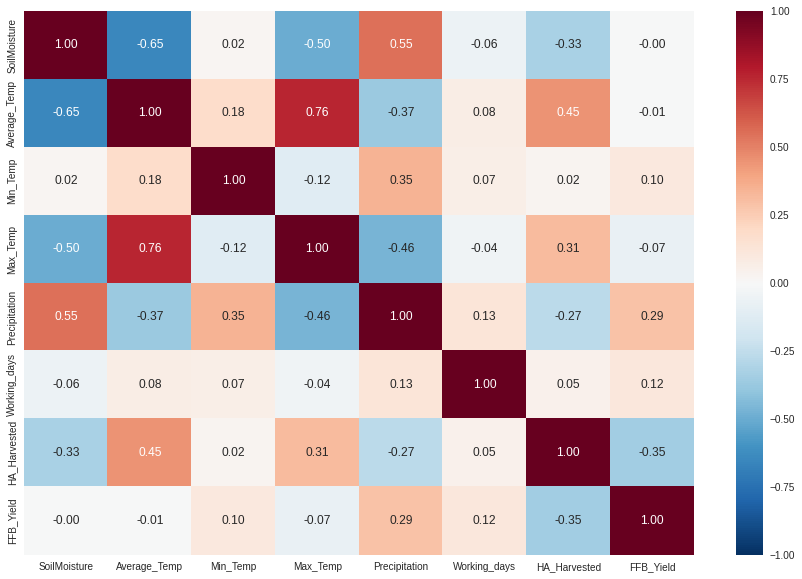

In [11]:
# Pearson Table
fig, ax = plt.subplots(figsize=(15, 10))
ax = heatmap(df.corr(),fmt=".2f",annot=True,ax=ax,cmap="RdBu_r",vmin=-1,vmax=1,)

**The data we use for analysis, mainly have normal distribution**

from pearson table:
* **Preciptation have positive correlation with FFB Yield** (there is a chance that FFB Yield influenced by Preciptation)
* **FFB yield is not correlated by temperature and soil moisture**
* **FFB yield slightly have positive correlation with working days** (there is a chance that if we have more working days, more HA harvedted, we got more FFB yield)

**To prove this assumption we use machine learning regression approach and indentify what kind of external variable that influance FFB_yield**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [13]:
exp_reg101 = setup(data = df, target = 'FFB_Yield', session_id=123, ignore_features=['Date'], normalize = True) 

,Description,Value
0,session_id,123
1,Target,FFB_Yield
2,Original Data,"(130, 9)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(90, 13)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Date'], id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='FFB_Yield',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('du

In [14]:
# Compare models option
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1861,0.0587,0.2358,0.1174,0.0914,0.1240,0.536
et,Extra Trees Regressor,0.1914,0.0591,0.2391,0.0994,0.0923,0.1260,0.377
ada,AdaBoost Regressor,0.1988,0.0652,0.2500,0.0167,0.0968,0.1331,0.075
lightgbm,Light Gradient Boosting Machine,0.2028,0.0650,0.2505,-0.0086,0.0967,0.1329,0.049
gbr,Gradient Boosting Regressor,0.1975,0.0647,0.2479,-0.0155,0.0964,0.1312,0.047
br,Bayesian Ridge,0.2207,0.0720,0.2634,-0.0252,0.1015,0.1459,0.025
knn,K Neighbors Regressor,0.2089,0.0715,0.2594,-0.0404,0.1015,0.1454,0.080
ridge,Ridge Regression,0.2189,0.0741,0.2655,-0.0748,0.1026,0.1458,0.025
lr,Linear Regression,0.2226,0.0765,0.2702,-0.1128,0.1051,0.1489,0.526
lar,Least Angle Regression,0.2232,0.0767,0.2705,-0.1138,0.1052,0.1494,0.032


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


**Based on model selection result, We use Random Forest Regressor as regressor model for FFB_Yield Prediction after getting lowest MSE score**

In [15]:
rf_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1874,0.0555,0.2356,0.1763,0.0895,0.1197
1,0.1865,0.0621,0.2491,0.3505,0.0875,0.0999
2,0.0979,0.0177,0.1330,0.8065,0.0542,0.0699
3,0.2144,0.0699,0.2643,-0.5542,0.1011,0.1358
4,0.1951,0.0510,0.2258,-0.0448,0.0840,0.1150
5,0.1497,0.0325,0.1802,0.0516,0.0731,0.1076
6,0.1935,0.0460,0.2145,0.3377,0.0861,0.1345
7,0.2229,0.0673,0.2595,0.6065,0.1005,0.1499
8,0.2362,0.1293,0.3595,-0.5585,0.1460,0.1965


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


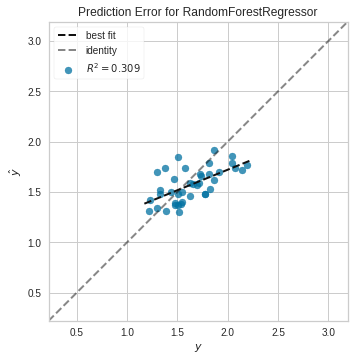

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
plot_model(rf_model, plot = 'error')

**R Squared on testing data is low. this is mean the model still not good enough and data sample is quite low**

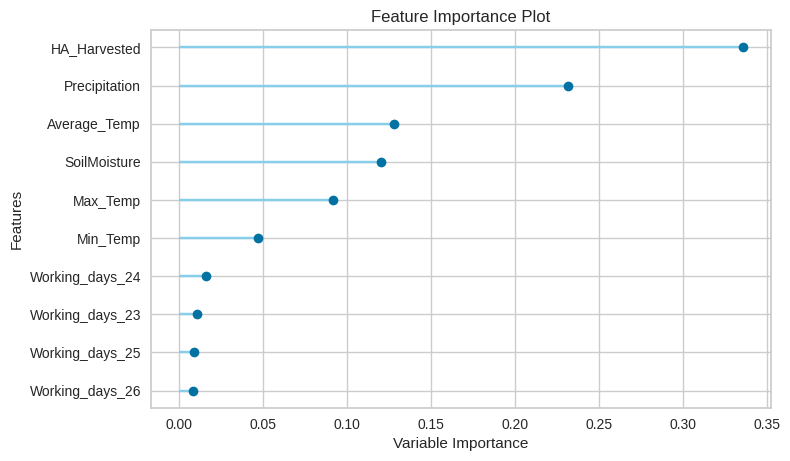

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(rf_model, plot='feature')

**Conclution** : <br>
If we look at main feature that influance prediction value from the model are show below :
1. **HA Harvested** (this is correct, more HA Harvested is mode FFB_Yield)
2. **Precipitation**
3. **Average temperature, Soil moisture, max and min temp** (this is a contrary to the correlation table, if we look back to correlation table, which this feature have nearly zero correlation, but in fact these features enter into influential features)
4. **FFB yield is not influenced by working days**

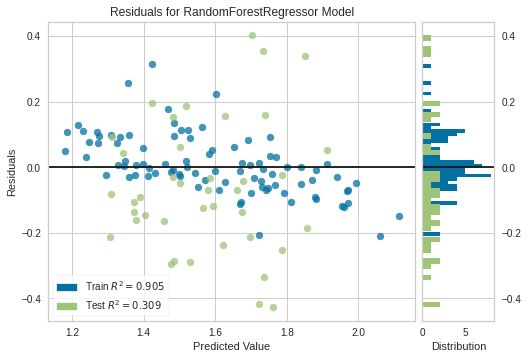

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(rf_model, plot = 'residuals')